In [6]:
import pandas as pd

df = pd.read_parquet(
    "https://pages.mysociety.org/parl_register_interests/data/all_time_register/latest/register_of_interests.parquet"
)

df = df[df["earliest_declaration"] > "2020-01-01"]

# remove any for category_name 'No declared interests'

df = df[df.category_name != "No declared interests"]

<Axes: title={'center': 'Number of rows per MP in the register of interests data'}, xlabel='Number of rows', ylabel='Number of MPs'>

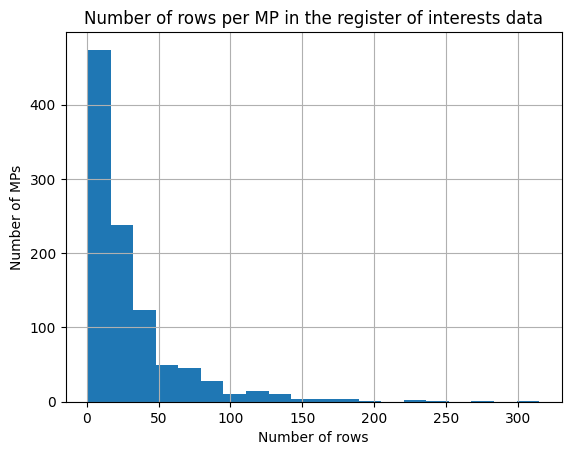

In [7]:
# we want to know for each public_whip_id how many rows there are

adf = df.groupby("public_whip_id").size().sort_values(ascending=False)

plot = adf.hist(bins=20)
plot.set_title("Number of rows per MP in the register of interests data")
plot.set_xlabel("Number of rows")
plot.set_ylabel("Number of MPs")

plot

In [8]:
def rough_buckets(n: int):
    match n:
        case _ if n < 10:
            return "a. 1-10"
        case _ if n < 20:
            return "b. 10-20"
        case _ if n < 50:
            return "c. 20-50"
        case _ if n < 100:
            return "d. 50-100"
        case _ if n < 200:
            return "e. 100-200"
        case _:
            return "f. 200+"


values = {}

values["full_parliament"] = (
    df.groupby("public_whip_id")
    .size()
    .sort_values(ascending=False)
    .apply(rough_buckets)
    .value_counts()
)
values["last_two_years"] = (
    df[df["earliest_declaration"] > "2022-07-01"]
    .groupby("public_whip_id")
    .size()
    .sort_values(ascending=False)
    .apply(rough_buckets)
    .value_counts()
)
values["last_one_year"] = (
    df[df["earliest_declaration"] > "2023-07-01"]
    .groupby("public_whip_id")
    .size()
    .sort_values(ascending=False)
    .apply(rough_buckets)
    .value_counts()
)

result = pd.DataFrame(values).fillna(0)

# create a new total row at the bottom

result.loc["total"] = result.sum().astype(int)
result

,full_parliament,last_two_years,last_one_year
a. 1-10,245,302.0,334.0
b. 10-20,297,334.0,352.0
c. 20-50,297,265.0,228.0
d. 50-100,121,63.0,44.0
e. 100-200,45,18.0,8.0
f. 200+,5,0.0,0.0
total,1010,982.0,966.0


In [9]:
# we want to know for each category, a count of the unique public_whip_id

full_parliament = (
    df.groupby("category_name")
    .public_whip_id.nunique()
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns={"public_whip_id": "mp_count"})
)

last_year = (
    df[df["earliest_declaration"] > "2023-07-01"]
    .groupby("category_name")
    .public_whip_id.nunique()
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns={"public_whip_id": "mp_count"})
)

last_two_years = (
    df[df["earliest_declaration"] > "2022-07-01"]
    .groupby("category_name")
    .public_whip_id.nunique()
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns={"public_whip_id": "mp_count"})
)

joined_df = (
    full_parliament.join(last_year, lsuffix="_all_parliament", rsuffix="_one_year")
    .join(last_two_years, lsuffix="", rsuffix="_last_two_years")
    .rename(columns={"mp_count": "mp_count_two_years"})
    .fillna(0)
)

joined_df = joined_df[
    ["mp_count_one_year", "mp_count_two_years", "mp_count_all_parliament"]
].astype(int)
joined_df = joined_df.sort_values("mp_count_one_year", ascending=False)
joined_df

# what we want to know
# how many mps with any interests in the three periods
# distribution of the number of rows per mp in the three periods

,mp_count_one_year,mp_count_two_years,mp_count_all_parliament
category_name,,,
Miscellaneous,592,609,647
(a) Support linked to an MP but received by a local party organisation or indirectly via a central party organisation,539,557,729
Employment and earnings,403,506,664
"Gifts, benefits and hospitality from UK sources",356,415,471
Visits outside the UK,274,337,381
"Land and property portfolio with a value over £100,000 and where indicated, the portfolio provides a rental income of over £10,000 a year",259,259,259
(b) Any other support not included in Category 2(a),239,259,332
(i) Shareholdings: over 15% of issued share capital,170,174,197
Family members employed and paid from parliamentary expenses,75,75,80
